
# Exploration des Données

## Import des bibliothèques


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import du dataset


In [3]:
df = pd.read_csv('dataset/housing_data_italy_august2022.csv')

## Informations & statistiques descriptives

In [4]:
print("\nInformation sur les données: ")
print(df.info())


Information sur les données: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    223409 non-null  int64  
 1   timestamp             223409 non-null  float64
 2   location              223409 non-null  object 
 3   title                 223409 non-null  object 
 4   price                 184293 non-null  float64
 5   n_rooms               163086 non-null  float64
 6   floor                 151044 non-null  float64
 7   mq                    219375 non-null  float64
 8   n_bathrooms           209012 non-null  float64
 9   year_of_construction  223399 non-null  float64
 10  availability          223409 non-null  object 
 11  energy_class          222730 non-null  object 
 12  status                223409 non-null  object 
 13  heating               223409 non-null  object 
 14  has_garage           

In [5]:
print("\nStatistiques descriptives: ")
print(df.describe())


Statistiques descriptives: 
                  id     timestamp         price        n_rooms  \
count  223409.000000  2.234090e+05  1.842930e+05  163086.000000   
mean   111705.000000  1.661136e+09  2.399390e+05       3.503372   
std     64492.767482  1.264542e+04  7.562062e+06       0.985630   
min         1.000000  1.661114e+09  1.000000e+00       2.000000   
25%     55853.000000  1.661125e+09  7.800000e+04       3.000000   
50%    111705.000000  1.661136e+09  1.350000e+05       3.000000   
75%    167557.000000  1.661146e+09  2.350000e+05       4.000000   
max    223409.000000  1.661159e+09  2.147484e+09       5.000000   

               floor             mq    n_bathrooms  year_of_construction  \
count  151044.000000  219375.000000  209012.000000         223399.000000   
mean        1.820847     158.632825       1.587540           1965.133241   
std         1.133222     128.681326       0.668034             76.746613   
min         1.000000       1.000000       1.000000           10

## Visualisation des prix


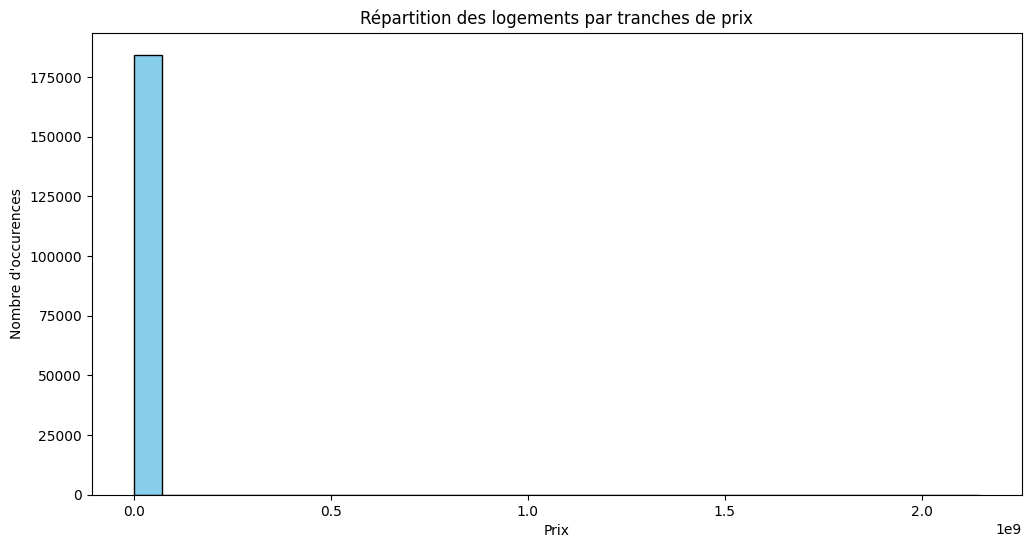

In [6]:
plt.figure(figsize = (12,6))
plt.hist(df['price'], bins = 30, color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par tranches de prix')
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()

Un outlier à 2 milliards fausse la visualisation.
On va limiter les valeurs de 0 à 1 million d'euros et affiner les tranches.

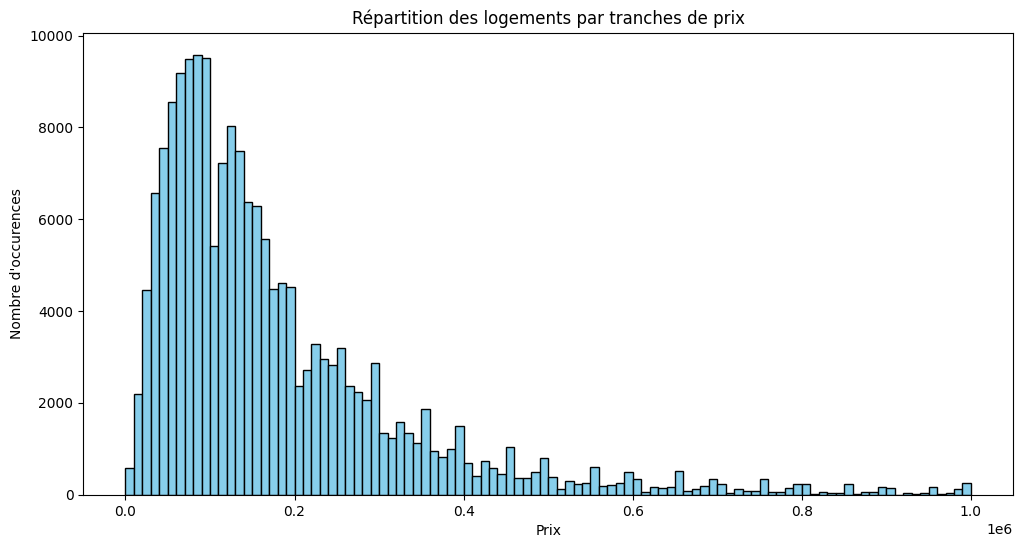

In [7]:
plt.figure(figsize = (12,6))
plt.hist(df['price'], bins = 100, range=(0, 1000000), color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par tranches de prix')
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()

Ajout de la moyenne, la médiane et les quartiles.

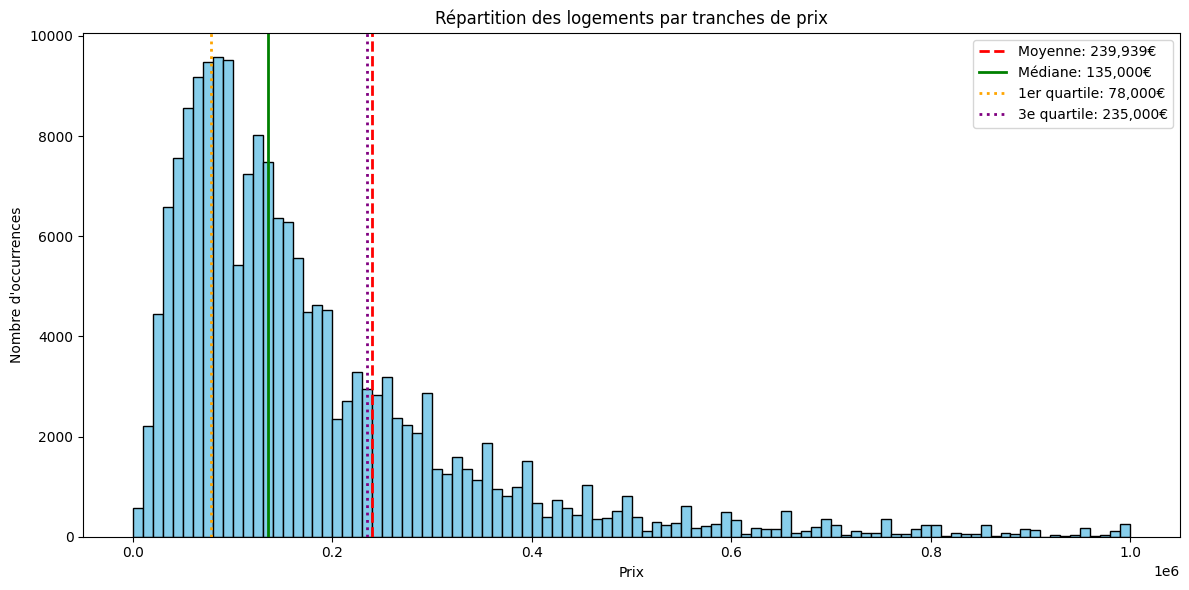

In [8]:
# Calcul des statistiques
mean_price = df['price'].mean()
median_price = df['price'].median()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Affichage
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=100, range=(0, 1000000), color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par tranches de prix')

# Ajout des lignes statistiques
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_price:,.0f}€')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_price:,.0f}€')
plt.axvline(q1, color='orange', linestyle=':', linewidth=2, label=f'1er quartile: {q1:,.0f}€')
plt.axvline(q3, color='purple', linestyle=':', linewidth=2, label=f'3e quartile: {q3:,.0f}€')

plt.legend()
plt.tight_layout()
plt.savefig('output/price_distribution.png')
plt.show()
plt.close()

## Visualisation des features

In [9]:
# Location

# Comptage des occurrences
location_counts = df['location'].value_counts()

# Nombre de catégories concernées
n_categories = location_counts.shape[0]
print(f"Nombre de catégories: {n_categories}")

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(location_counts.index, location_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Localisation')
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des logements par localisation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/location_distribution.png')
plt.show()
plt.close()

Nombre de catégories: 7023


KeyboardInterrupt: 

On constate :
- Un nombre très important de catégories (beaucoup trop pour du one hot encoding)
- Une rupture importante aux alentours de 50 occurrences.

On va donc afficher uniquement les catégories avec au moins 50 occurrences.

Nombre de catégories avec au moins 50 occurrences : 771


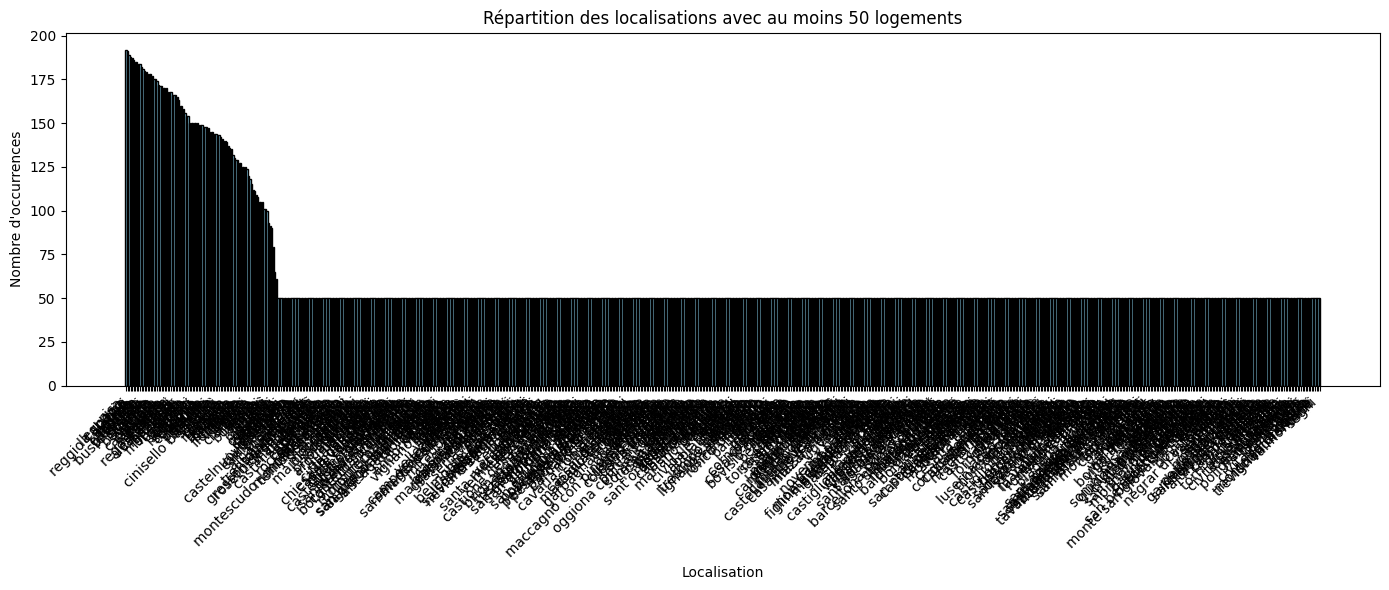

In [82]:
# Comptage des occurrences
location_counts = df['location'].value_counts()

# Filtrage : on garde les catégories avec au moins 50 occurrences
location_counts = location_counts[location_counts >= 50]

# Nombre de catégories concernées
n_categories = location_counts.shape[0]
print(f"Nombre de catégories avec au moins 50 occurrences : {n_categories}")

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(location_counts.index, location_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Localisation')
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des localisations avec au moins 50 logements")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/location_distribution_min50.png')
plt.show()
plt.close()

On remarque que la limite doit être fixée un peu au-delà.
Essayons avec 70.

Nombre de catégories avec au moins 70 occurrences : 96


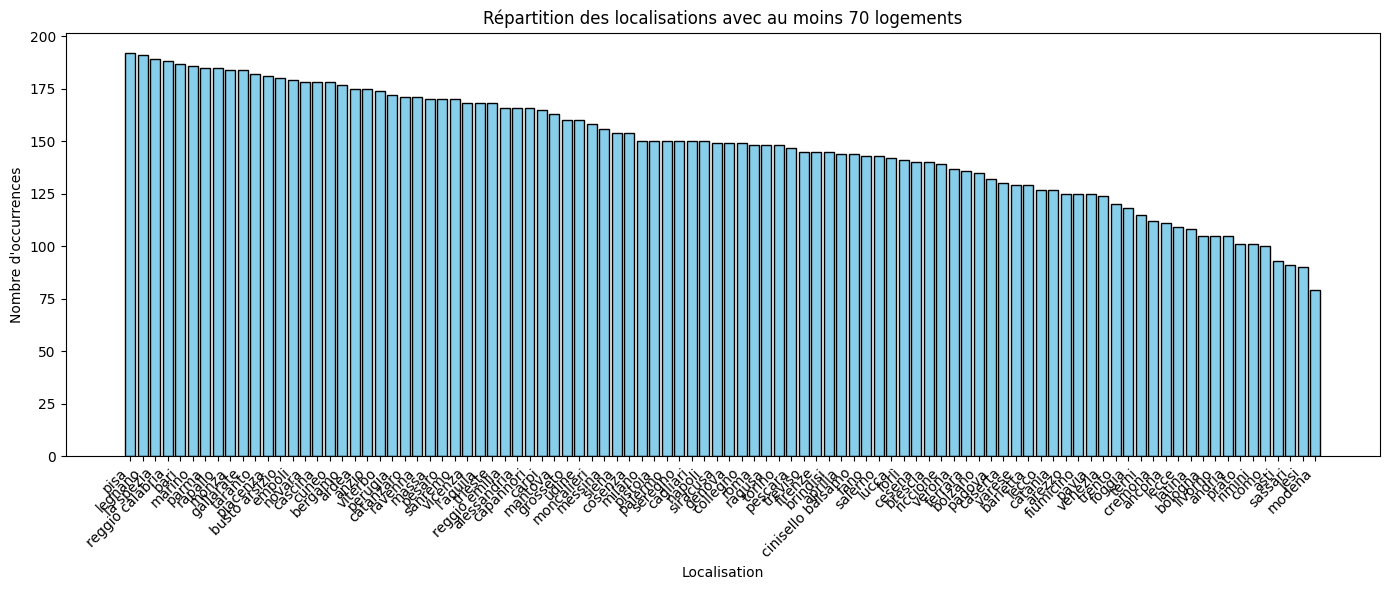

In [19]:
# Comptage des occurrences
location_counts = df['location'].value_counts()

# Filtrage : on garde les catégories avec au moins 70 occurrences
location_counts = location_counts[location_counts >= 70]

# Nombre de catégories concernées
n_categories = location_counts.shape[0]
print(f"Nombre de catégories avec au moins 70 occurrences : {n_categories}")

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(location_counts.index, location_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Localisation')
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des localisations avec au moins 70 logements")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/location_distribution_min70.png')
plt.show()
plt.close()

Cela restreint à 96 catégories. Cela semble encore beaucoup trop pour du one hot encoding.
Un choix devra être fait :
- Supprimer la colonne
- Limiter le one hot encoding pour certaines valeurs : Combien en retenir ?

### n_rooms


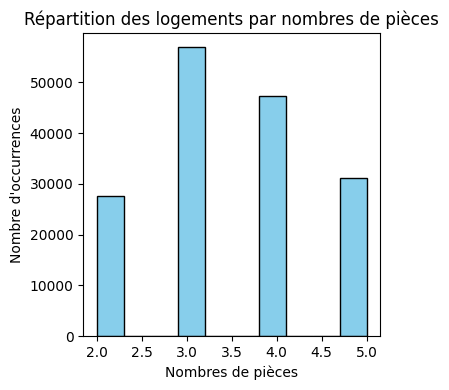

In [84]:
# Comptage des occurrences
n_rooms_counts = df['n_rooms'].value_counts()

# Affichage
plt.figure(figsize=(4, 4))
plt.hist(df['n_rooms'], color='skyblue', edgecolor='black')
plt.xlabel('Nombres de pièces')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par nombres de pièces')

plt.tight_layout()
plt.savefig('output/number_rooms_distribution.png')
plt.show()
plt.close()

### n_bathrooms

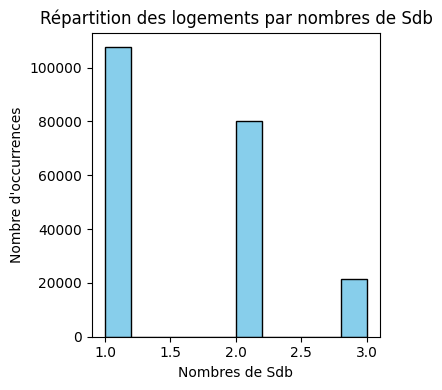

In [85]:
# Comptage des occurrences
n_bathrooms_counts = df['n_bathrooms'].value_counts()

# Affichage
plt.figure(figsize=(4, 4))
plt.hist(df['n_bathrooms'], color='skyblue', edgecolor='black')
plt.xlabel('Nombres de Sdb')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par nombres de Sdb')

plt.tight_layout()
plt.savefig('output/number_bathrooms_distribution.png')
plt.show()
plt.close()

### floor

Statistiques sur la variable 'floor' :
 - Min     : 1.0
 - Max     : 52.0
 - Moyenne : 1.82
 - Médiane : 2.0
 - Q1 (25%): 1.0
 - Q3 (75%): 2.0


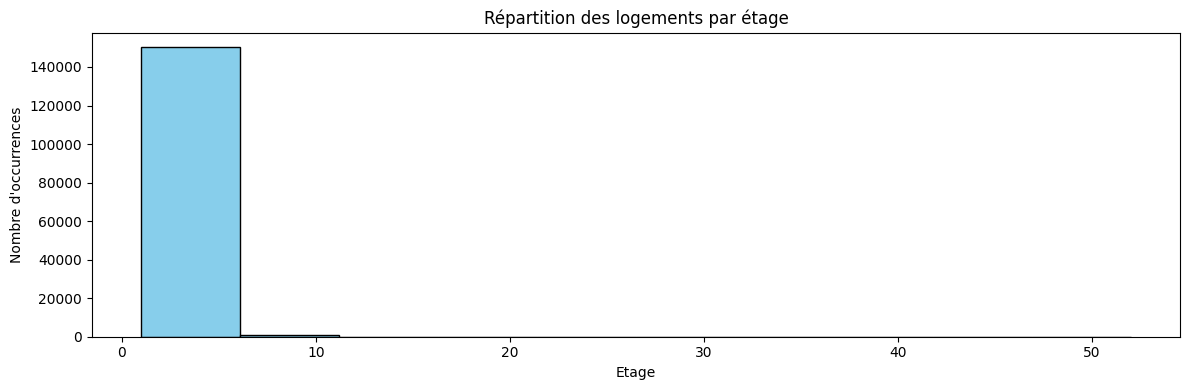

In [10]:
# Suppression des valeurs manquantes pour les stats
floor_data = df['floor'].dropna()

# Calcul des statistiques
floor_min = floor_data.min()
floor_max = floor_data.max()
floor_mean = floor_data.mean()
floor_median = floor_data.median()
floor_q1 = floor_data.quantile(0.25)
floor_q3 = floor_data.quantile(0.75)

# Affichage des statistiques
print("Statistiques sur la variable 'floor' :")
print(f" - Min     : {floor_min}")
print(f" - Max     : {floor_max}")
print(f" - Moyenne : {floor_mean:.2f}")
print(f" - Médiane : {floor_median}")
print(f" - Q1 (25%): {floor_q1}")
print(f" - Q3 (75%): {floor_q3}")

# Comptage des occurrences
floor_counts = df['floor'].value_counts()

# Affichage
plt.figure(figsize=(12, 4))
plt.hist(df['floor'], color='skyblue', edgecolor='black')
plt.xlabel('Etage')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par étage')

plt.tight_layout()
plt.savefig('output/floor_distribution.png')
plt.show()
plt.close()

On constate la présence d'un outlier.

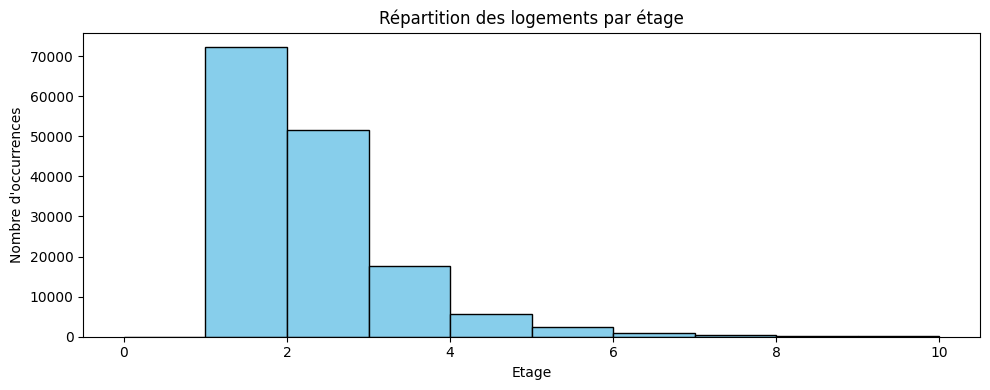

In [87]:
# Comptage des occurrences
floor_counts = df['floor'].value_counts()

# Affichage
plt.figure(figsize=(10, 4))
plt.hist(df['floor'], bins = 10, range=(0, 10), color='skyblue', edgecolor='black')
plt.xlabel('Etage')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des logements par étage')

plt.tight_layout()
plt.savefig('output/floor_distribution.png')
plt.show()
plt.close()

### Energy Class

Nombre de catégories: 12


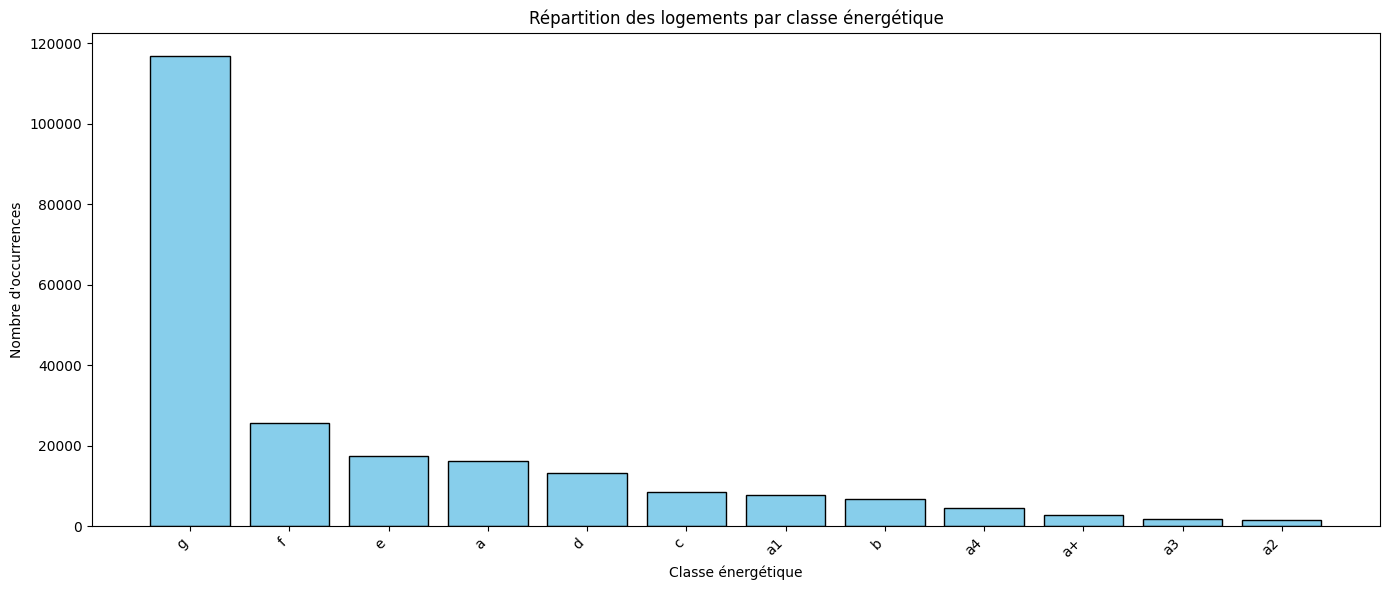

In [88]:
# Comptage des occurrences
energy_class_counts = df['energy_class'].value_counts()

# Nombre de catégories concernées
n_categories = energy_class_counts.shape[0]
print(f"Nombre de catégories: {n_categories}")

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(energy_class_counts.index, energy_class_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Classe énergétique')
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des logements par classe énergétique")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/energy_class_distribution.png')
plt.show()
plt.close()

On constate la présence de 12 catégories.
Ce nombre semble trop important pour du one hot encoding.
On peut facilement réduire ce nombre en regroupant les catégories a, a1, a2, a3, a4 et a+.
On peut également regrouper les catégories B et C qui sont proches et peu nombreuses.

Une autre possibilité consistera en encoding catégoriel linéaire (g = 0, f = 1, e = 2, d = 3...)

Nombre de catégories fusionnées: 6


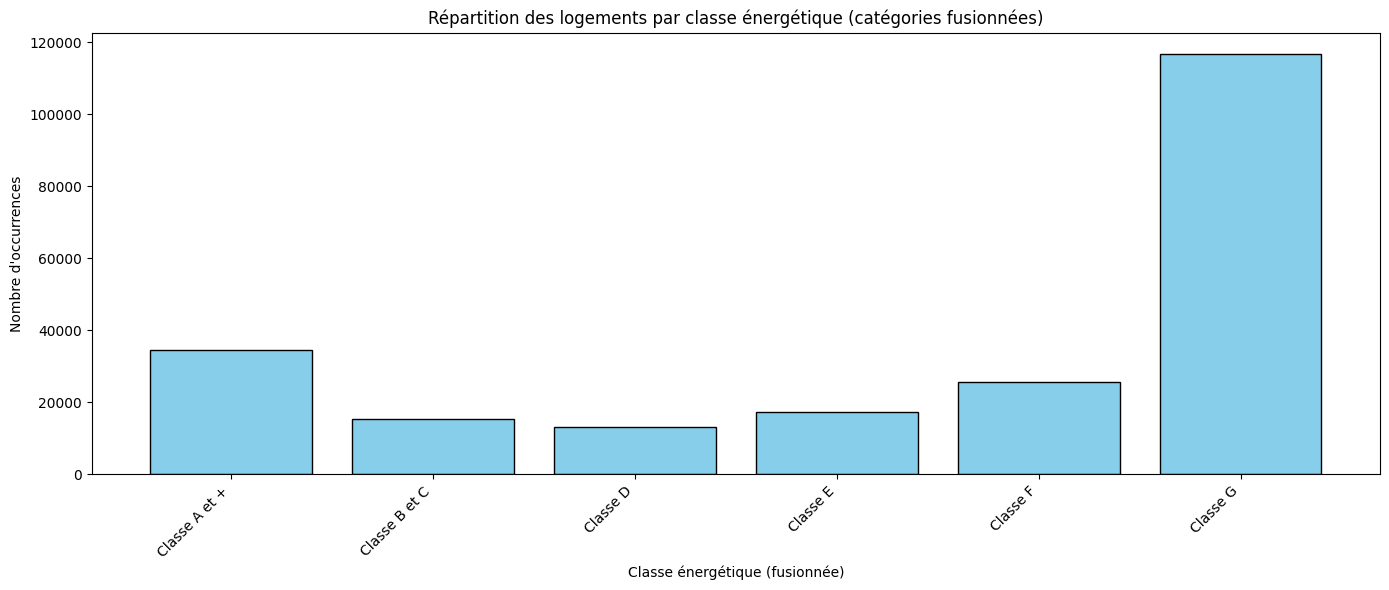

In [90]:
# Définir un dictionnaire de regroupement
group_map = {
    'a': 'Classe A et +',
    'a1': 'Classe A et +',
    'a2': 'Classe A et +',
    'a3': 'Classe A et +',
    'a4': 'Classe A et +',
    'a+': 'Classe A et +',
    'b': 'Classe B et C',
    'c': 'Classe B et C',
    'd': 'Classe D',
    'e': 'Classe E',
    'f': 'Classe F',
    'g': 'Classe G',
}

# Remplacement temporaire pour affichage (sans modifier le df d'origine)
energy_class_temp = df['energy_class'].map(group_map)

# Comptage des occurrences
energy_class_counts = energy_class_temp.value_counts().sort_index()

# Nombre de catégories après regroupement
n_categories = energy_class_counts.shape[0]
print(f"Nombre de catégories fusionnées: {n_categories}")

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(energy_class_counts.index, energy_class_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Classe énergétique (fusionnée)')
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des logements par classe énergétique (catégories fusionnées)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/energy_class_grouped_distribution.png')
plt.show()
plt.close()

### Année de Construction

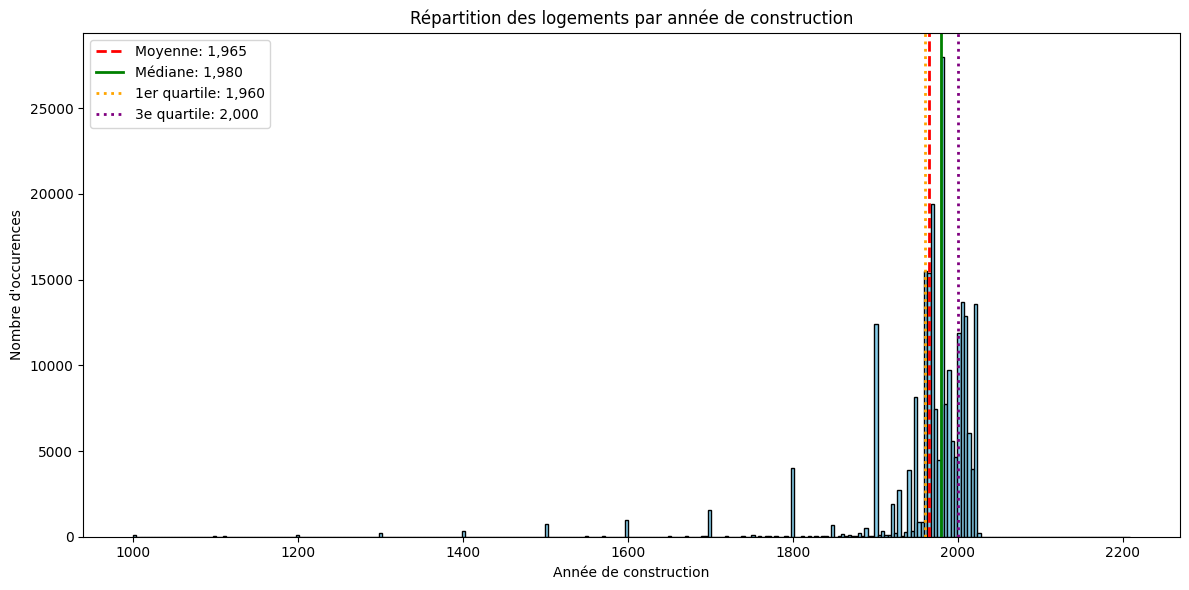

In [91]:
# Calcul des statistiques
mean_year = df['year_of_construction'].mean()
median_year = df['year_of_construction'].median()
q1_year = df['year_of_construction'].quantile(0.25)
q3_year = df['year_of_construction'].quantile(0.75)

# Affichage
plt.figure(figsize = (12,6))
plt.hist(df['year_of_construction'], bins = 300, color='skyblue', edgecolor='black')
plt.xlabel('Année de construction')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par année de construction')

# Ajout des lignes statistiques
plt.axvline(mean_year, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_year:,.0f}')
plt.axvline(median_year, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_year:,.0f}')
plt.axvline(q1_year, color='orange', linestyle=':', linewidth=2, label=f'1er quartile: {q1_year:,.0f}')
plt.axvline(q3_year, color='purple', linestyle=':', linewidth=2, label=f'3e quartile: {q3_year:,.0f}')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig('output/year_of_construction_distribution.png')
plt.show()
plt.close()

On constate :
- Des valeurs abérentes (postérieures à 2022)
- Des outliers allant jusqu'à l'an 1000

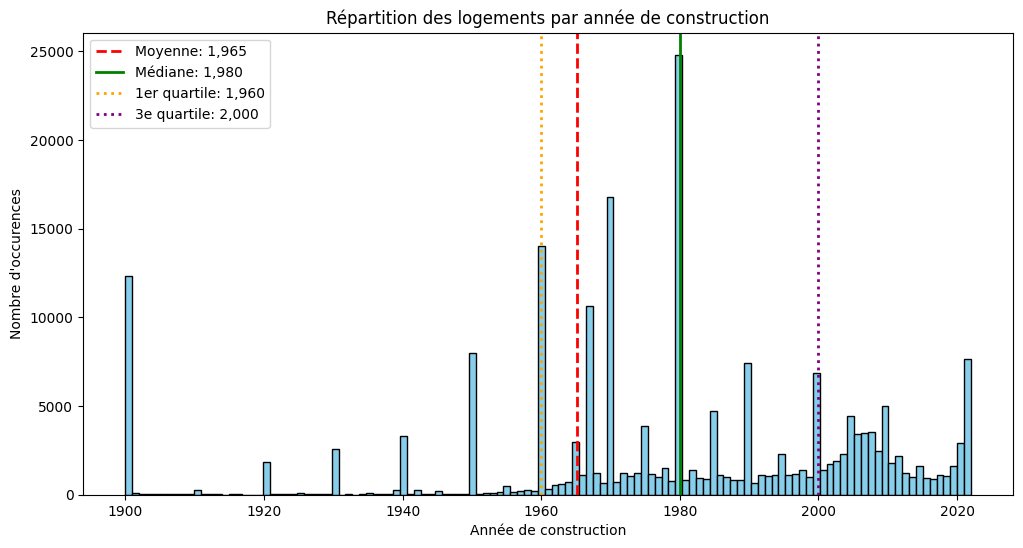

In [92]:
# Calcul des statistiques
mean_year = df['year_of_construction'].mean()
median_year = df['year_of_construction'].median()
q1_year = df['year_of_construction'].quantile(0.25)
q3_year = df['year_of_construction'].quantile(0.75)

# Affichage
plt.figure(figsize = (12,6))
plt.hist(df['year_of_construction'], bins = 123, range= (1900, 2022), color='skyblue', edgecolor='black')
plt.xlabel('Année de construction')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par année de construction')

# Ajout des lignes statistiques
plt.axvline(mean_year, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_year:,.0f}')
plt.axvline(median_year, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_year:,.0f}')
plt.axvline(q1_year, color='orange', linestyle=':', linewidth=2, label=f'1er quartile: {q1_year:,.0f}')
plt.axvline(q3_year, color='purple', linestyle=':', linewidth=2, label=f'3e quartile: {q3_year:,.0f}')

plt.legend(loc = 'upper left')
plt.savefig('output/year_of_construction_distribution.png')
plt.show()
plt.close()

On constante encore :
- Des données approximatives (surreprésentation des valeures multiples de 10)
- Des valeurs probablement fausses (surreprésentation de l'année 2022.

Cette colonne sera probablement ignorée.

### Surface du logement

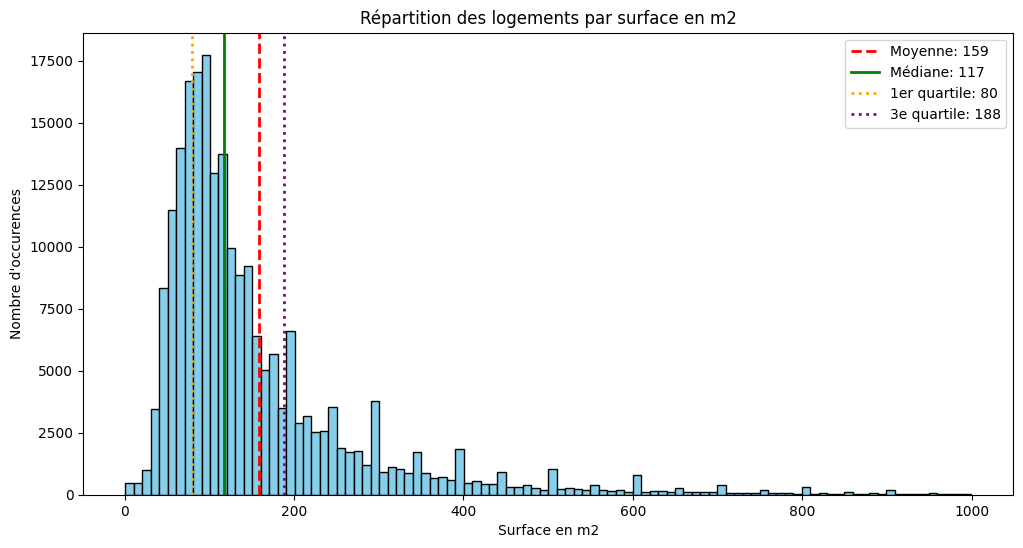

In [93]:
# Calcul des statistiques
mean_surface = df['mq'].mean()
median_surface = df['mq'].median()
q1_surface = df['mq'].quantile(0.25)
q3_surface = df['mq'].quantile(0.75)

# Affichage
plt.figure(figsize = (12,6))
plt.hist(df['mq'], bins = 100, color='skyblue', edgecolor='black')
plt.xlabel('Surface en m2')
plt.ylabel('Nombre d\'occurences')
plt.title('Répartition des logements par surface en m2')

# Ajout des lignes statistiques
plt.axvline(mean_surface, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_surface:,.0f}')
plt.axvline(median_surface, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_surface:,.0f}')
plt.axvline(q1_surface, color='orange', linestyle=':', linewidth=2, label=f'1er quartile: {q1_surface:,.0f}')
plt.axvline(q3_surface, color='purple', linestyle=':', linewidth=2, label=f'3e quartile: {q3_surface:,.0f}')

plt.legend(loc = 'upper right')
plt.savefig('output/surface_distribution.png')
plt.show()
plt.close()

### Boolean Values :
has_garage
has_terrace
has_garden
has_balcony
has_fireplace
has_alarm
has_air_conditioning
has_pool
has_parking
has_elevator
is_furnished

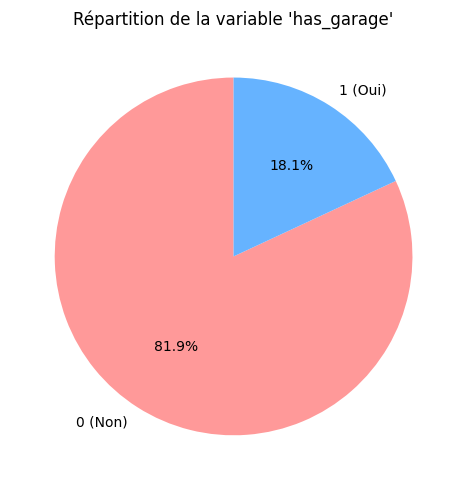

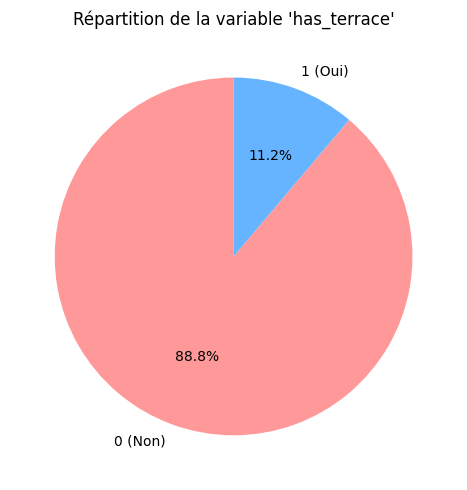

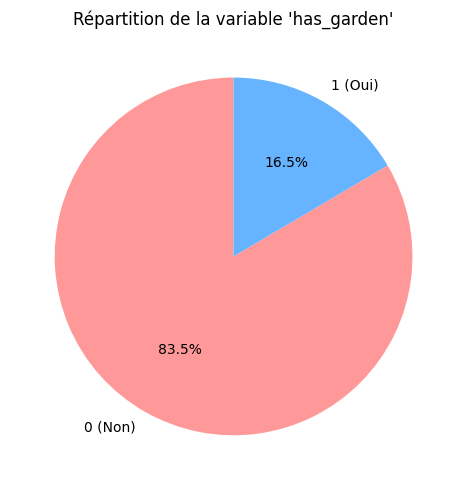

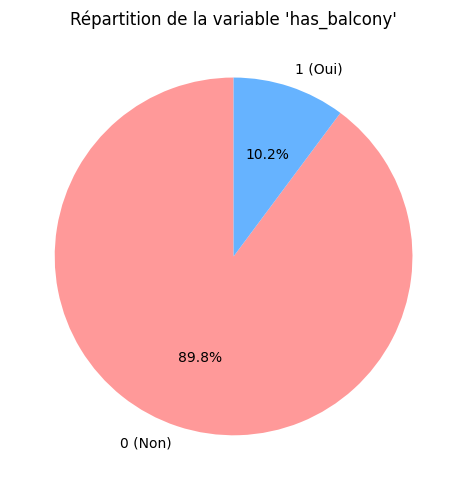

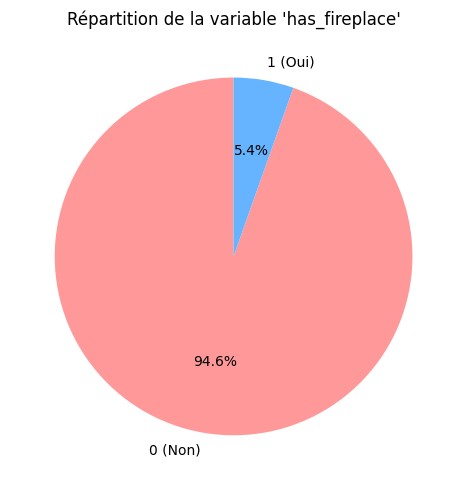

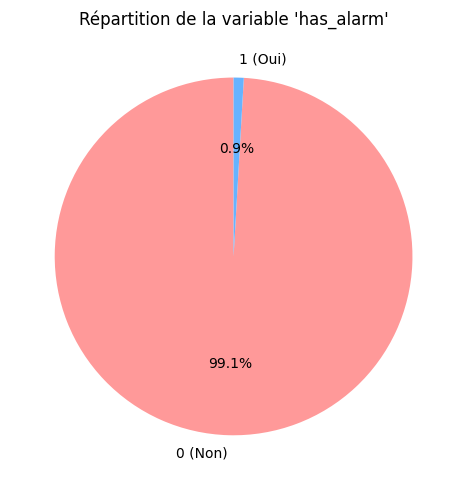

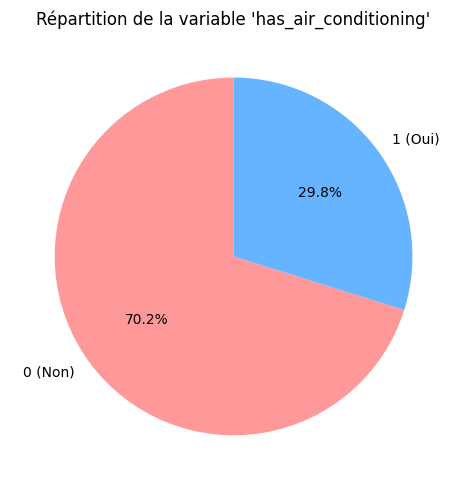

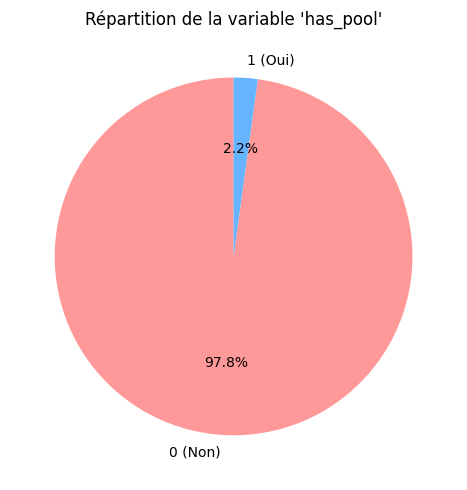

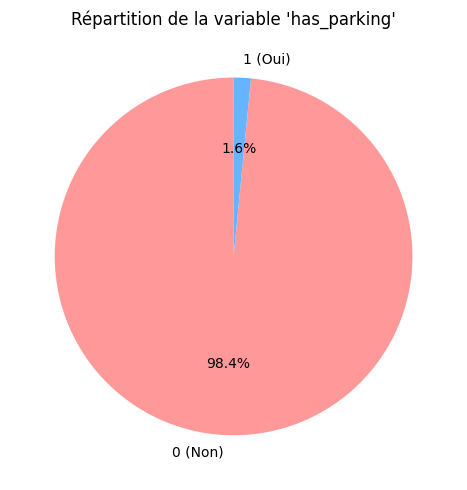

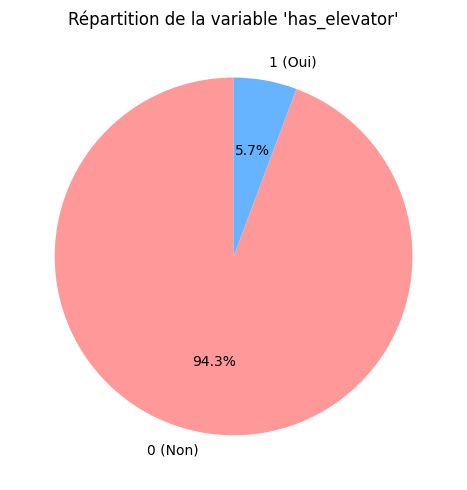

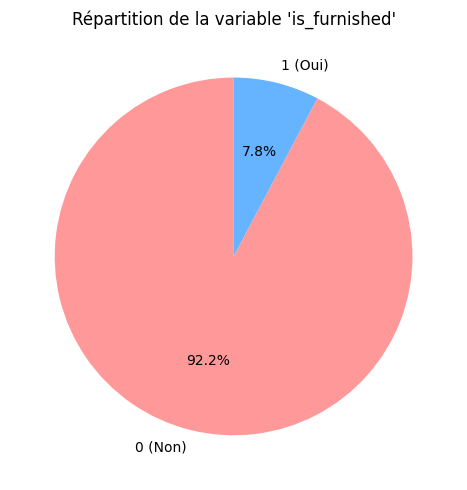

In [12]:
# Liste des colonnes booléennes à visualiser
boolean_features = [
    'has_garage', 'has_terrace', 'has_garden', 'has_balcony',
    'has_fireplace', 'has_alarm', 'has_air_conditioning',
    'has_pool', 'has_parking', 'has_elevator', 'is_furnished'
]

# Boucle sur chaque feature pour générer un camembert
for feature in boolean_features:
    counts = df[feature].value_counts(dropna=False).sort_index()

    # Préparer les labels : 0, 1 et 'manquant'
    labels = []
    for val in counts.index:
        if pd.isna(val):
            labels.append('manquant')
        elif val == 0:
            labels.append('0 (Non)')
        elif val == 1:
            labels.append('1 (Oui)')
        else:
            labels.append(str(val))

    # Tracé du camembert
    plt.figure(figsize=(5, 5))
    plt.pie(
        counts.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff', '#dddddd'][:len(counts)]
    )
    plt.title(f"Répartition de la variable '{feature}'")
    plt.tight_layout()
    plt.savefig(f'output/{feature}_pie.png')
    plt.show()
    plt.close()



### Availability

In [14]:
# Comptage des occurrences, y compris les valeurs manquantes
availability_counts = df['availability'].value_counts(dropna=False)
total = len(df)

# Affichage texte
print("Répartition des logements par disponibilité :")
for category, count in availability_counts.items():
    label = 'manquant' if pd.isna(category) else str(category)
    percent = (count / total) * 100
    print(f"- {label:<20}: {count:>6} ({percent:5.2f}%)")


Répartition des logements par disponibilité :
- not free / other    : 223409 (100.00%)


On voit immédiatement que cette colonne est inutile et sera supprimée.


### Status

In [16]:
# Comptage des occurrences, y compris les valeurs manquantes
status_counts = df['status'].value_counts(dropna=False)
total = len(df)

# Affichage texte
print("Répartition des logements par statut :")
for status, count in status_counts.items():
    label = 'manquant' if pd.isna(status) else str(status)
    percent = (count / total) * 100
    print(f"- {label:<20}: {count:>6} ({percent:5.2f}%)")



Répartition des logements par statut :
- other               : 223409 (100.00%)


Idem pour cette colonne qui sera également supprimée

### Heating

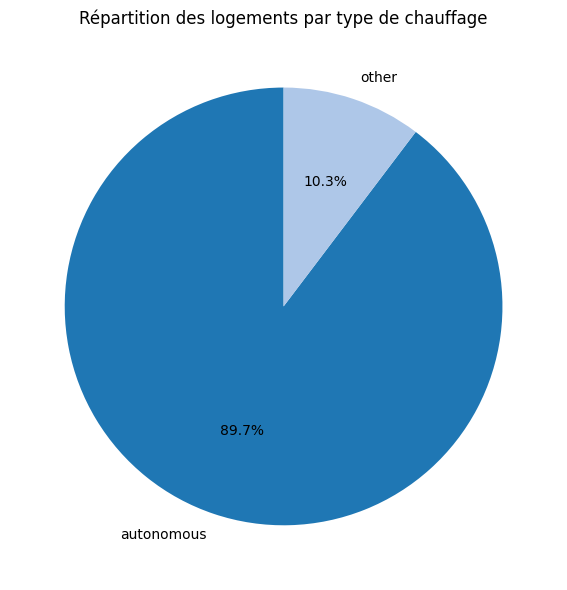

In [18]:
# Comptage des occurrences (inclut les valeurs manquantes)
heating_counts = df['heating'].value_counts(dropna=False)
total = len(df)

# Préparation des labels
labels = ['manquant' if pd.isna(v) else str(v) for v in heating_counts.index]

# Tracé du camembert
plt.figure(figsize=(6, 6))
plt.pie(
    heating_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors  # Palette pour distinguer les catégories
)

plt.title("Répartition des logements par type de chauffage")
plt.tight_layout()
plt.savefig('output/heating_distribution_pie.png')
plt.show()
plt.close()


La question de la pertinence de cette colonne peut ici se poser.
Nous avons seulement 2 catégories dont une est "other". Ceci semble réduire fortément la pertinence de cette donnée.

## Analyse des données manquantes


In [98]:
# Ces données ont déjà été affichée au début mais nous les répétons ici :
print("\nInformation sur les données: ")
print(df.info())


Information sur les données: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223409 entries, 0 to 223408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    223409 non-null  int64  
 1   timestamp             223409 non-null  float64
 2   location              223409 non-null  object 
 3   title                 223409 non-null  object 
 4   price                 184293 non-null  float64
 5   n_rooms               163086 non-null  float64
 6   floor                 151044 non-null  float64
 7   mq                    219375 non-null  float64
 8   n_bathrooms           209012 non-null  float64
 9   year_of_construction  223399 non-null  float64
 10  availability          223409 non-null  object 
 11  energy_class          222730 non-null  object 
 12  status                223409 non-null  object 
 13  heating               223409 non-null  object 
 14  has_garage           

Colonnes pleines :

- timestamp             223409
- location              223409
- title                 223409
- availability          223409
- status                223409
- heating               223409
- has_garage            223409
- has_terrace           223409
- has_garden            223409
- has_balcony           223409
- has_fireplace         223409
- has_alarm             223409
- has_air_conditioning  223409
- has_pool              223409
- has_parking           223409
- has_elevator          223409
- is_furnished          223409

Données incomplètes :
- Price : 184293
- n_rooms : 163086
- floor : 151044
- mq : 219375
- n_bathrooms : 209012
- year_of_construction : 223399
- energy_class : 222730



In [99]:
# Total de lignes dans le dataset
total = 223409

# Données incomplètes (valeurs présentes pour chaque variable)
data_counts = {
    'Price': 184293,
    'n_rooms': 163086,
    'floor': 151044,
    'mq': 219375,
    'n_bathrooms': 209012,
    'year_of_construction': 223399,
    'energy_class': 222730
}

# Affichage
for variable, count in data_counts.items():
    percent = (count / total) * 100
    print(f"{variable} : {count} données présentes ({percent:.2f}%)")

Price : 184293 données présentes (82.49%)
n_rooms : 163086 données présentes (73.00%)
floor : 151044 données présentes (67.61%)
mq : 219375 données présentes (98.19%)
n_bathrooms : 209012 données présentes (93.56%)
year_of_construction : 223399 données présentes (100.00%)
energy_class : 222730 données présentes (99.70%)


### Lignes incomplètes

In [100]:
# Total de lignes
total_rows = len(df)

# 1. Nombre de lignes avec au moins une valeur manquante
n_incomplete_rows = df.isnull().any(axis=1).sum()
percent_incomplete = (n_incomplete_rows / total_rows) * 100

# 2. Nombre de lignes où 'price' est manquant
n_price_missing = df['price'].isnull().sum()
percent_price_missing = (n_price_missing / total_rows) * 100

# 3. Nombre de lignes où 'price' est présent, mais au moins une autre donnée est manquante
mask_price_present = df['price'].notnull()
mask_other_missing = df.drop(columns='price').isnull().any(axis=1)
n_price_present_but_other_missing = df[mask_price_present & mask_other_missing].shape[0]
percent_price_present_but_other_missing = (n_price_present_but_other_missing / mask_price_present.sum()) * 100

# Affichage
print(f"1. Lignes incomplètes : {n_incomplete_rows} ({percent_incomplete:.2f}%)")
print(f"2. Lignes avec 'price' manquant : {n_price_missing} ({percent_price_missing:.2f}%)")
print(f"3. Lignes avec 'price' présent mais d'autres données manquantes : {n_price_present_but_other_missing} ({percent_price_present_but_other_missing:.2f}%)")

1. Lignes incomplètes : 131300 (58.77%)
2. Lignes avec 'price' manquant : 39116 (17.51%)
3. Lignes avec 'price' présent mais d'autres données manquantes : 92184 (50.02%)


On constate :
- De nombreuses lignes sont incomplètes.
- Si on enlève les données dont le prix est manquant, ce taux monte à 50%.
- Il sera donc quasi impératif de compléter avec des données synthétiques.

## Récapitulatif des analyses pour chaque colonne :

- id : inutile / à supprimer
- timestamp : inutile / à supprimer
- location : utile mais fortement multicatégorielle -> difficulté à prévoir dans son traitement
- title : on pourrait potentiellement faire une analyse NLP mais la durée de projet nous l'interdit. à supprimer
- price : label (y)
- n_rooms : feature (x). utilité forte. Beaucoup de données manquantes (27%)
- floor : feature (x). utilité probablement faible. Beaucoup de données manquantes (32%)
- mq : feature (x). utilité forte. Peu de données manquantes (< 2%)
- n_bathrooms : utilité assez forte. Peu de données manquantes (6.5%)
- year_of_construction : Très peu de données manquantes (< 1%) mais la répartition nous indique de fortes approximations et des valeurs aberrantes.
- availability : 100% des données sont identiques : inutile / à supprimer
- energy_class : feature (x) catégorielle hiérarchique. utile
- status : 100% des données sont identiques : inutile / à supprimer
- heating : Données réparties en 2 catégories dont l'une est "other". Peu exploitable -> feature (x) binaire ? ou suppression ?
- has_garage : Feature binaire (x)
- has_terrace : Feature binaire (x)
- has_garden : Feature binaire (x)
- has_balcony : Feature binaire (x)
- has_fireplace : Feature binaire (x)
- has_alarm : Feature binaire (x)
- has_air_conditioning : Feature binaire (x)
- has_pool : Feature binaire (x)
- has_parking : Feature binaire (x)
- has_elevator : Feature binaire (x)
- is_furnished : Feature binaire (x)




-

### Matrice de corrélation

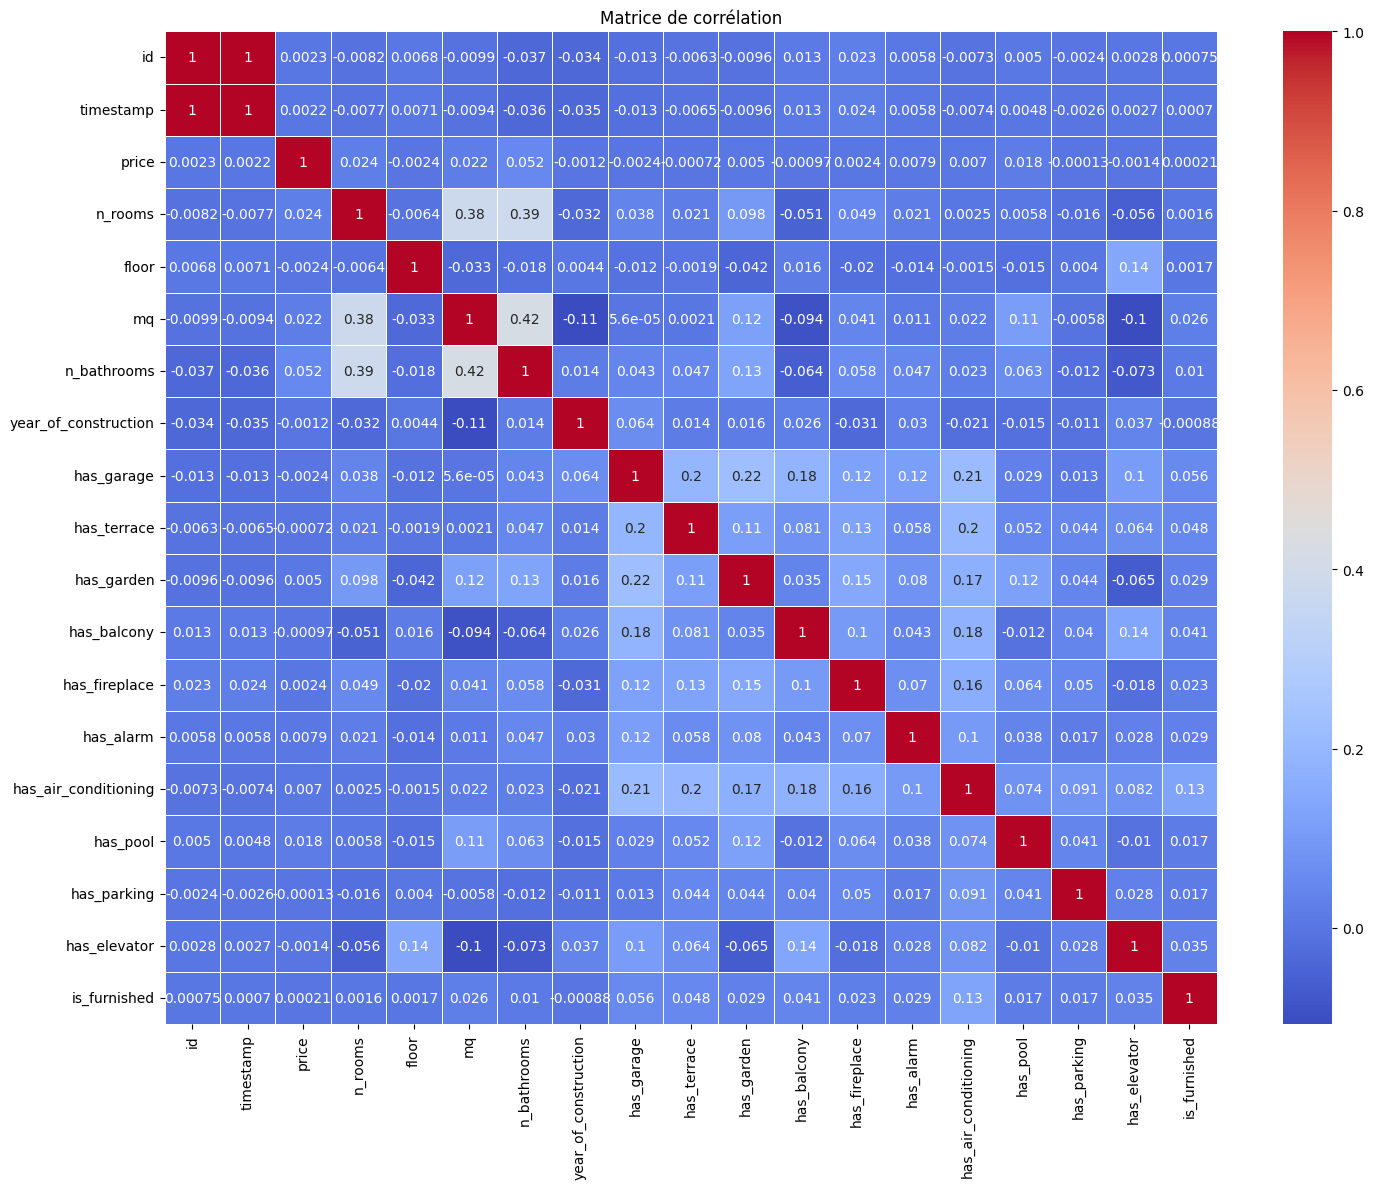

In [24]:
# Sélection des colonnes numériques uniquement
numeric_df = df.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage avec seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.savefig('output/correlation_matrix.png')
plt.show()
plt.close()